In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [40]:
%env KMP_DUPLICATE_LIB_OK=TRUE

env: KMP_DUPLICATE_LIB_OK=TRUE


In [41]:
DATA_DIR = "../../datasets/sberbank-russian-housing-market/"

In [42]:
# What is in the data dir?

files = os.listdir(DATA_DIR)
data_list = [os.path.join(DATA_DIR,file) for file in files]

data_list

['../../datasets/sberbank-russian-housing-market/macro.csv',
 '../../datasets/sberbank-russian-housing-market/.DS_Store',
 '../../datasets/sberbank-russian-housing-market/data_dictionary.txt',
 '../../datasets/sberbank-russian-housing-market/test.csv',
 '../../datasets/sberbank-russian-housing-market/train.csv',
 '../../datasets/sberbank-russian-housing-market/sample_submission.csv']

In [43]:
# Read the data
df = pd.read_csv(data_list[4])

In [44]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [45]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [46]:
df.shape

(30471, 292)

# Missing values

### Where do they come from?
- Someone forgot
- This data point was not collected
- Data was lost while transferring manually from a legacy database
- There was a programming error


In [47]:
df_rows=df.dropna()
df_cols = df.dropna(axis = 1)

print("Rows, columns when removing nas on axis 0 :{}, \nRows, columns when removing nas on axis 1: {}".format(df_rows.shape, df_cols.shape))

Rows, columns when removing nas on axis 0 :(6042, 292), 
Rows, columns when removing nas on axis 1: (30471, 241)


In [48]:
# TODO: What values are missing? How much are they missing? Does it make sense to impute them, or some of them?

In [49]:
# PCA: How does it look if we project the data into two dimensions?

pca = PCA(n_components=2)
df_cols = df_cols.select_dtypes(exclude=["object"])
projected = pca.fit_transform(df_cols)

Text(0, 0.5, 'component 2')

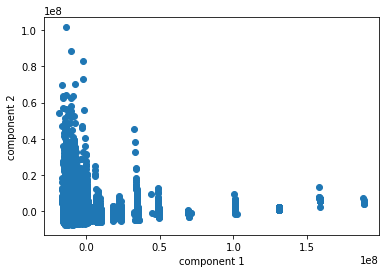

In [50]:
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

In [51]:
left_cols = list(df_rows.columns)

In [52]:
survived_cols = set(["price_doc", "id","full_sq", "life_sq", "floor", "max_floor", "material", "build_year", "num_room", "kitchen_sq", "sub_area","product_type"]).intersection(set(left_cols))
df_small = df_rows[list(survived_cols)]

In [53]:
df_small.head()

,full_sq,product_type,num_room,floor,price_doc,life_sq,material,id,max_floor,build_year,sub_area
8056,11,Investment,1.0,2.0,2750000,11.0,2.0,8059,5.0,1907.0,Hamovniki
8154,45,Investment,2.0,6.0,7100000,27.0,1.0,8157,9.0,1970.0,Severnoe Butovo
8287,77,Investment,3.0,3.0,11700000,50.0,2.0,8290,5.0,1957.0,Ajeroport
8387,56,Investment,2.0,5.0,10400000,29.0,5.0,8390,16.0,1987.0,Horoshevo-Mnevniki
8391,31,Investment,1.0,5.0,6200000,21.0,5.0,8394,9.0,1962.0,Ramenki


In [54]:
df_small = df_small.select_dtypes(exclude=["object"])

In [55]:
df_small.head()

,full_sq,num_room,floor,price_doc,life_sq,material,id,max_floor,build_year
8056,11,1.0,2.0,2750000,11.0,2.0,8059,5.0,1907.0
8154,45,2.0,6.0,7100000,27.0,1.0,8157,9.0,1970.0
8287,77,3.0,3.0,11700000,50.0,2.0,8290,5.0,1957.0
8387,56,2.0,5.0,10400000,29.0,5.0,8390,16.0,1987.0
8391,31,1.0,5.0,6200000,21.0,5.0,8394,9.0,1962.0


In [56]:
# Let's give xgboost a go with only numerical values

In [57]:
train, test, y_train, y_test = train_test_split(df_small.drop(["price_doc"], axis=1), df_small["price_doc"], random_state=10, test_size=0.25)

In [58]:
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

In [59]:
# Train 

# Parameter Tuning
model = xgb.XGBRegressor()
model.fit(train,y_train)



XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [60]:
# Parameter tuning
# This takes too long
#model = xgb.XGBClassifier
#param_dist = {"max_depth": [10,30,50],
#              "min_child_weight" : [1,3,6],
#              "n_estimators": [200],
#              "learning_rate": [0.05, 0.1,0.16],}

#grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   #verbose=10, n_jobs=-1)
#grid_search.fit(train, y_train)

#grid_search.best_estimator_

In [61]:
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
#rf.fit(train, y_train);

In [62]:
predictions = model.predict(test)

In [63]:
predictions

array([ 6705315. , 12743296. ,  4824819.5, ...,  8539926. ,  5621362. ,
        7531504.5], dtype=float32)

In [64]:
y_test

29274     7150000
30361    11500000
10447     8500000
16251     6750000
13025     9750000
10885     5800000
21843    11100000
25529     6505600
16210    11500000
29199    12700000
28313     7000000
13925     1000000
26695     5591476
19402     7000000
11639     6500000
22428    12500000
25019     2000000
12102     3831615
16648     5100000
15583     6000000
26397     6460000
19451    12500000
28470    12800000
22139     5100000
13322    11000000
15729    20300000
14314    10400000
19684     7450000
10637     6300000
16435     8400000
           ...   
12093    10000000
27215     8000000
23166     6700000
13977     6700000
14400    14900000
13248     3600000
10121     7150000
23667     6900000
22668     6900000
25565     7900000
13373     5900000
21363     8000000
13184    11200000
30133    10000000
15296     4350000
14392     8000000
28262     6650000
29531     6050000
20732    14884250
11769    23045878
20380     7300000
19167     8200000
23427     5850000
14438      999990
21422     